<a href="https://colab.research.google.com/github/roanacla/ML_Sensationalism/blob/main/Sensationalism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict

In this section you can test the factor by sending a news' title.

In [ ]:
#Clone repository
!git clone https://github.com/roanacla/nlp_sensationalism_scorer
# %cd nlp_sensationalism_scorer
# !pip install -r requirements.txt

Cloning into 'nlp_sensationalism_scorer'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 10 (delta 2), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
#Import module
from sensaScorer import SensaScorer
sensa = SensaScorer()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
#Test factor
sensa.getScore('Talking about it: what do the quasi-China''s richest man and the world''s richest man talk about eating together?')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


0.85

#Train Model using DistilBERT

In this section, we train a model using DistilBERT

## Install and import dependencies

In [ ]:
%cd /content/
from google_drive_downloader import GoogleDriveDownloader as gdd
#Download dataset file
gdd.download_file_from_google_drive(file_id='1kSn7OC7bkDDg-3U4JdLrQa8bTqbHlbHE',
                                  dest_path='./chinese english score 15000 records.csv',
                                  unzip=False)
!pip install transformers


     |████████████████████████████████| 1.3MB 13.0MB/s 
     |████████████████████████████████| 2.9MB 56.7MB/s 
     |████████████████████████████████| 1.1MB 63.3MB/s 
     |████████████████████████████████| 890kB 53.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=c5a94d480cad074108fdc32725366f41124fdd09f7368ed9d0fe756db0515608
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
# Import dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

### Load, visualize and prepare data

In [ ]:
# Load Dataset
df = pd.read_csv('chinese english score 15000 records.csv')


In [ ]:
# Show dataset
df.head(15)

,Chinese,English,Score
0,可 穿戴 技术 十大 设计 原则,Ten Design Principles of Wearable Technology,0.00143
1,经济学 人 ： 智能手机 将 成为 “ 真正 的 个人电脑 ”,"The Economist: Smartphones will become ""real p...",0.01545
2,雅虎 宣布 剥离 阿里巴巴 股份,Yahoo announces divestiture of Alibaba shares,0.00069
3,51 信用卡 管家 ， 预计 2015 年 放贷 额度 远超 30 亿,"51 Credit card housekeeper, it is estimated th...",0.00721
4,如何 选择 正确 的 编程语言 进行 学习,How to choose the right programming language f...,0.04724
5,媒体 融合 关键 是 以人为本,The key to media integration is people-oriented,0.00266
6,自行车 不能 带上 火车,Bicycles cannot be taken on the train,0.00719
7,北京警方 确认 李代沫 吸毒 被捕 ( 图 ),Beijing police confirmed that Li Daimo was arr...,0.00022
8,生态 兴则 文明 兴 生态 衰则 文明 衰,The prosperity of ecology leads to the prosper...,0.07086
9,成都 飞 北京 航班 多人 吸烟 机组人员 与 未 吸烟 乘客 冲突,Conflict between multi-smoking crew and non-sm...,0.21124


In [ ]:
# See the sape of the original dataset
df.shape

(15578, 3)

#
## Encode using BERT

In [ ]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
# model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [ ]:
# Tokenize the sentences
tokenized = df.English.apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
tokenized

0       [101, 2702, 2640, 6481, 1997, 4929, 3085, 2974...
1       [101, 1996, 11708, 1024, 26381, 2015, 2097, 24...
2       [101, 20643, 17472, 11529, 16643, 11244, 1997,...
3       [101, 4868, 4923, 4003, 22583, 1010, 2009, 200...
4       [101, 2129, 2000, 5454, 1996, 2157, 4730, 2653...
                              ...                        
2495    [101, 1996, 2503, 2466, 1997, 1996, 26668, 264...
2496    [101, 1996, 2280, 18429, 2158, 1999, 17137, 90...
2497    [101, 7211, 1998, 8344, 1998, 2060, 2184, 3182...
2498    [101, 2943, 3424, 1011, 7897, 8039, 1996, 2117...
2499    [101, 2054, 2065, 1996, 2231, 2038, 2053, 2769...
Name: English, Length: 2500, dtype: object

In [ ]:
# Convert to 2D array, so BERT process all at once
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
padded

array([[  101,  2702,  2640, ...,     0,     0,     0],
       [  101,  1996, 11708, ...,     0,     0,     0],
       [  101, 20643, 17472, ...,     0,     0,     0],
       ...,
       [  101,  7211,  1998, ...,     0,     0,     0],
       [  101,  2943,  3424, ...,     0,     0,     0],
       [  101,  2054,  2065, ...,     0,     0,     0]])

In [ ]:
np.array(padded).shape

(2500, 40)

In [ ]:
# Masking
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(2500, 40)

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
#Save states
# torch.save(model, 'model')
#Load model
# model = torch.load('model')

In [ ]:
#We'll save those in the features variable
features = last_hidden_states[0][:,0,:].numpy()

### Apply GMM

Use GMM to visualize how many labels (targets) to use.

In [ ]:
  ###Test GMM
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
SC = StandardScaler()
X_Scale= SC.fit_transform(features)
X_Scale = SC.transform(X_Scale)
print(X_Scale)
X_Normalize = normalize(X_Scale)

# Converting normalized data to Pandas Dataframe
X_normalize_dataframe = pd.DataFrame(X_Normalize)

[[-1.1099964   8.231718   -1.9483546  ...  2.3864605  -6.970358
  -0.3705986 ]
 [ 1.3867279  -6.7417774   2.7998571  ... -7.845653    1.4267106
  -3.1564865 ]
 [-1.1930048   5.4699163  -1.2102545  ... -0.9477329  -5.589295
  -0.27464548]
 ...
 [ 6.020613   -0.5456259   4.383604   ... -5.5537276   0.79239947
  -3.9365928 ]
 [-5.8163447  -2.0126882  -2.2644923  ... -6.426618   -4.4667106
  -6.0362124 ]
 [ 4.993724    5.381212    2.0150182  ... -1.5836265   2.1241019
  -2.6604197 ]]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalize_dataframe)
PCA_components = pd.DataFrame(X_principal)
PCA_components.columns = ['P1','P2']
PCA_components.head()

,P1,P2
0,-0.100122,0.276358
1,0.221200,0.304630
2,0.385029,0.233978
3,0.160736,-0.042158
4,-0.293026,0.228056


Text(0, 0.5, 'PCA 2')

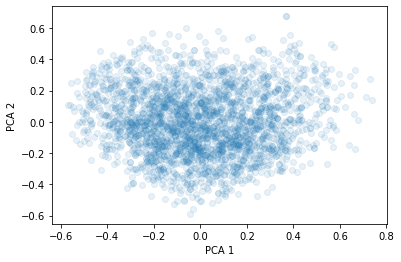

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(PCA_components['P1'], PCA_components['P2'], alpha=.1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
#Test Silhouette Score to verify number of clusters
for n in list(range(2,10)):
    clusterer2=GaussianMixture(n_components=n,
                               covariance_type='full').fit(PCA_components)
    preds2=clusterer2.predict(PCA_components); centers2=clusterer2.means_
    score2=silhouette_score(PCA_components,preds2,metric='mahalanobis')
    print("For number of clusters = {}, the silhouette_score is : {}"\
          .format(n,score2))

For number of clusters = 2, the silhouette_score is : 0.3236249491205284
For number of clusters = 3, the silhouette_score is : 0.36775543811290434
For number of clusters = 4, the silhouette_score is : 0.3249829624544192
For number of clusters = 5, the silhouette_score is : 0.32059469567190946
For number of clusters = 6, the silhouette_score is : 0.32739246939009975
For number of clusters = 7, the silhouette_score is : 0.3286711763226146
For number of clusters = 8, the silhouette_score is : 0.3133041444900052
For number of clusters = 9, the silhouette_score is : 0.30727664931789994


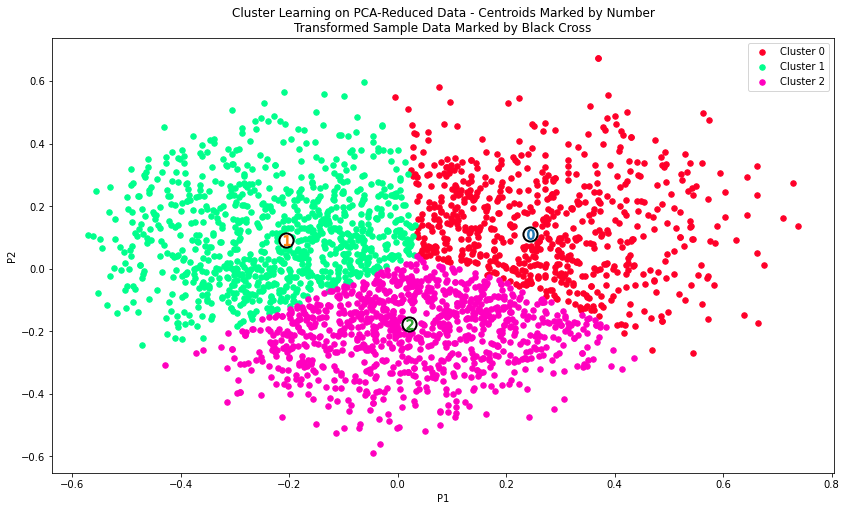

In [ ]:
import matplotlib.cm as cm
def cluster_results(reduced_data, preds, centers):
	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)
	fig, ax = plt.subplots(figsize = (14,8))
	cmap = cm.get_cmap('gist_rainbow')
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'P1', y = 'P2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");

clusterer2=GaussianMixture(n_components=3,
                           covariance_type='full').fit(PCA_components)
preds2=clusterer2.predict(PCA_components)
centers2=clusterer2.means_; score2=silhouette_score(PCA_components,preds2)
cluster_results(PCA_components,preds2,centers2)

### Label data

After running GMM, the best number of labels to use is 3

| Label | Description |
| ----------- | ----------- |
| 3 | Sensational |
| 2 | Barely sensational |
| 1 | Not sensational |


In [ ]:
# Divide score in 3
df["isSensa"] = [1 if x >= 0.5 else 0 for x in df.Score]

for index in df.index:
  if df.Score[index] >= 0.6666:
    df['isSensa'][index] = 3
  elif df.Score[index] >= 0.3333:
    df['isSensa'][index] = 2
  else:
    df['isSensa'][index] = 1

In [ ]:
df.head(10)

,Chinese,English,Score,isSensa
0,可 穿戴 技术 十大 设计 原则,Ten Design Principles of Wearable Technology,0.00143,1
1,经济学 人 ： 智能手机 将 成为 “ 真正 的 个人电脑 ”,"The Economist: Smartphones will become ""real p...",0.01545,1
2,雅虎 宣布 剥离 阿里巴巴 股份,Yahoo announces divestiture of Alibaba shares,0.00069,1
3,51 信用卡 管家 ， 预计 2015 年 放贷 额度 远超 30 亿,"51 Credit card housekeeper, it is estimated th...",0.00721,1
4,如何 选择 正确 的 编程语言 进行 学习,How to choose the right programming language f...,0.04724,1
5,媒体 融合 关键 是 以人为本,The key to media integration is people-oriented,0.00266,1
6,自行车 不能 带上 火车,Bicycles cannot be taken on the train,0.00719,1
7,北京警方 确认 李代沫 吸毒 被捕 ( 图 ),Beijing police confirmed that Li Daimo was arr...,0.00022,1
8,生态 兴则 文明 兴 生态 衰则 文明 衰,The prosperity of ecology leads to the prosper...,0.07086,1
9,成都 飞 北京 航班 多人 吸烟 机组人员 与 未 吸烟 乘客 冲突,Conflict between multi-smoking crew and non-sm...,0.21124,1


In [ ]:
#Count sensa
df.isSensa.value_counts()

3    5580
2    5225
1    4773
Name: isSensa, dtype: int64

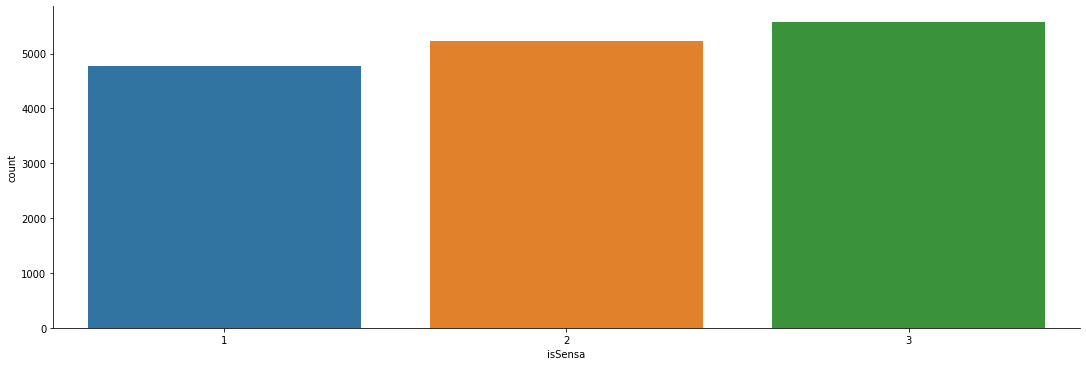

In [ ]:
#Visualize Distribution 2500 records
chart = sns.catplot(x='isSensa', kind="count", data=df,height=5, aspect=3)

In [ ]:
# Remove unnecesary columns
df.drop(['Chinese', 'Score'], axis=1, inplace= True)
df.head(10)

,English,isSensa
0,Ten Design Principles of Wearable Technology,1
1,"The Economist: Smartphones will become ""real p...",1
2,Yahoo announces divestiture of Alibaba shares,1
3,"51 Credit card housekeeper, it is estimated th...",1
4,How to choose the right programming language f...,1
5,The key to media integration is people-oriented,1
6,Bicycles cannot be taken on the train,1
7,Beijing police confirmed that Li Daimo was arr...,1
8,The prosperity of ecology leads to the prosper...,1
9,Conflict between multi-smoking crew and non-sm...,1


In [ ]:
# # Drop some values between 0.1 and 0.2 
# indexNames = df[ (df['Score'] >= 0.0) & (df['Score'] < 0.333) ].index
# indexNames = indexNames[4173:4773]
# df.drop(indexNames , inplace=True)

## Train and test model

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

### Logistic Regression

In [ ]:
# The labels indicating which sentence is positive and negative now go into the labels variable
labels = df.isSensa

In [ ]:
#split data train, test
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
features.shape

(15578, 768)

In [ ]:
# train logistic regression model
lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Test model 
lr_clf.score(test_features, test_labels)

0.4534017971758665

### Other classifiers

#### Test 2500 records

In [ ]:
#Test 2500 records

Classifier = Random Forest, Score (test, accuracy) = 26.27, Training time = 0.03 seconds
Classifier = Nearest Neighbors, Score (test, accuracy) = 24.67, Training time = 2.02 seconds
Classifier = Linear SVM, Score (test, accuracy) = 26.00, Training time = 27.79 seconds
Classifier = RBF SVM, Score (test, accuracy) = 26.80, Training time = 31.20 seconds
Classifier = AdaBoost, Score (test, accuracy) = 25.73, Training time = 8.28 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 24.93, Training time = 0.02 seconds
Classifier = Neural Net, Score (test, accuracy) = 26.53, Training time = 12.26 seconds
--------------------------------------------------------------------------------
Best --> Classifier = RBF SVM, Score (test, accuracy) = 26.80


#### Test 5000 records

In [ ]:
#Test 5000 records

Classifier = Random Forest, Score (test, accuracy) = 28.73, Training time = 0.04 seconds
Classifier = Nearest Neighbors, Score (test, accuracy) = 26.27, Training time = 7.86 seconds
Classifier = Linear SVM, Score (test, accuracy) = 27.40, Training time = 96.03 seconds
Classifier = RBF SVM, Score (test, accuracy) = 30.33, Training time = 115.48 seconds
Classifier = AdaBoost, Score (test, accuracy) = 26.80, Training time = 17.57 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 28.07, Training time = 0.04 seconds
Classifier = Neural Net, Score (test, accuracy) = 28.87, Training time = 15.82 seconds
--------------------------------------------------------------------------------
Best --> Classifier = RBF SVM, Score (test, accuracy) = 30.33


#### Test 11000 records

In [ ]:
#Test 11000 records

Classifier = Random Forest, Score (test, accuracy) = 42.36, Training time = 0.07 seconds
Classifier = Nearest Neighbors, Score (test, accuracy) = 40.33, Training time = 49.98 seconds
Classifier = Linear SVM, Score (test, accuracy) = 48.42, Training time = 454.25 seconds
Classifier = RBF SVM, Score (test, accuracy) = 43.30, Training time = 513.17 seconds
Classifier = AdaBoost, Score (test, accuracy) = 45.70, Training time = 40.58 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 45.27, Training time = 0.09 seconds
Classifier = Neural Net, Score (test, accuracy) = 47.00, Training time = 14.29 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Linear SVM, Score (test, accuracy) = 48.42


#### Test 15000 records

In [ ]:
# Test 15000 records

Classifier = Random Forest, Score (test, accuracy) = 39.58, Training time = 0.10 seconds
Classifier = Nearest Neighbors, Score (test, accuracy) = 38.13, Training time = 83.57 seconds
Classifier = Linear SVM, Score (test, accuracy) = 45.23, Training time = 921.50 seconds
Classifier = RBF SVM, Score (test, accuracy) = 38.21, Training time = 1018.80 seconds
Classifier = AdaBoost, Score (test, accuracy) = 42.81, Training time = 56.94 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 43.54, Training time = 0.10 seconds
Classifier = Neural Net, Score (test, accuracy) = 44.27, Training time = 18.91 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Linear SVM, Score (test, accuracy) = 45.23


In [ ]:
# X_data_reshape = data.drop(['ListPrice'], axis=1, inplace=False) # Features
# y_data = data.ListPrice # Target variable
from sklearn.preprocessing import StandardScaler
X, y = features, labels

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

names = ["Random Forest", "Nearest Neighbors","Linear SVM", "RBF SVM","AdaBoost","Naive Bayes","Neural Net"]
# names = ["Naive Bayes","Neural Net"]
# names = ["Naive Bayes"]
classifiers = [
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    KNeighborsClassifier(2),           
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    AdaBoostClassifier(),
    GaussianNB(),
    MLPClassifier(alpha=1, max_iter=2000)]

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

## Pickel Model

In [ ]:
import pickle
from zipfile import ZipFile
import os

In [ ]:
names = ["Linear SVM", "RBF SVM","AdaBoost","Random Forest", "Nearest Neighbors",
         "Naive Bayes", "Neural Net"]
classifiers = [
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    AdaBoostClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    KNeighborsClassifier(2),
    GaussianNB(),
    MLPClassifier(alpha=1, max_iter=1000)]

In [ ]:
# pickling models
with ZipFile('models.zip', 'w') as myzip:
    for name, clf in zip(names, classifiers):
        pickle.dump(clf, open(f'{name}_model.pickle', 'wb'))
        myzip.write(f'{name}_model.pickle')
        os.remove(f'{name}_model.pickle')

In [ ]:
# unpickling models
names = ["Linear SVM", "RBF SVM","AdaBoost","Random Forest", "Nearest Neighbors",
         "Naive Bayes", "Neural Net"]

with ZipFile('models.zip', 'r') as myzip:
    for name in names:
        clf_reload = pickle.load(myzip.open(f'{name}_model.pickle'))
        print(clf_reload)

#Trian Model BERT + Fine Tuning

In this section, a model is trained using BERT + fine tunning.

In [ ]:
!pip install transformers
from google_drive_downloader import GoogleDriveDownloader as gdd
# #Download trained model file
gdd.download_file_from_google_drive(file_id='1SpfmiCq2a2aXTXvFW6cHnm-0eBCpcyxY',
                                  dest_path='./sensationalism_BERT_best.model',
                                  unzip=False)
#Download dataset file
gdd.download_file_from_google_drive(file_id='1kSn7OC7bkDDg-3U4JdLrQa8bTqbHlbHE',
                                  dest_path='./chinese english score 15000 records.csv',
                                  unzip=False)

In [ ]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('chinese english score 15000 records.csv')
df.head()

,Chinese,English,Score
0,可 穿戴 技术 十大 设计 原则,Ten Design Principles of Wearable Technology,0.00143
1,经济学 人 ： 智能手机 将 成为 “ 真正 的 个人电脑 ”,"The Economist: Smartphones will become ""real p...",0.01545
2,雅虎 宣布 剥离 阿里巴巴 股份,Yahoo announces divestiture of Alibaba shares,0.00069
3,51 信用卡 管家 ， 预计 2015 年 放贷 额度 远超 30 亿,"51 Credit card housekeeper, it is estimated th...",0.00721
4,如何 选择 正确 的 编程语言 进行 学习,How to choose the right programming language f...,0.04724


In [ ]:
# Divide score in 3
df["isSensa"] = [1 if x >= 0.5 else 0 for x in df.Score]

for index in df.index:
  if df.Score[index] >= 0.6666:
    df['isSensa'][index] = 'Sensationalist'
  elif df.Score[index] >= 0.3333:
    df['isSensa'][index] = 'Barely sensationalist'
  else:
    df['isSensa'][index] = 'Not sensationalist'

df['isSensa'].value_counts()

Sensationalist           5580
Barely sensationalist    5225
Not sensationalist       4773
Name: isSensa, dtype: int64

In [ ]:
possible_labels = df.isSensa.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'Barely sensationalist': 1, 'Not sensationalist': 0, 'Sensationalist': 2}

In [ ]:
df['label'] = df.isSensa.replace(label_dict)

In [ ]:
df.head()

,Chinese,English,Score,isSensa,label
0,可 穿戴 技术 十大 设计 原则,Ten Design Principles of Wearable Technology,0.00143,Not sensationalist,0
1,经济学 人 ： 智能手机 将 成为 “ 真正 的 个人电脑 ”,"The Economist: Smartphones will become ""real p...",0.01545,Not sensationalist,0
2,雅虎 宣布 剥离 阿里巴巴 股份,Yahoo announces divestiture of Alibaba shares,0.00069,Not sensationalist,0
3,51 信用卡 管家 ， 预计 2015 年 放贷 额度 远超 30 亿,"51 Credit card housekeeper, it is estimated th...",0.00721,Not sensationalist,0
4,如何 选择 正确 的 编程语言 进行 学习,How to choose the right programming language f...,0.04724,Not sensationalist,0


In [ ]:

from sklearn.model_selection import train_test_split

X, y = df.index.values, df.label.values

X_train, X_val, y_train, y_val = train_test_split(X, 
                                                  y, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=df.label.values)

df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

df.groupby(['isSensa', 'label', 'data_type']).count()

Chinese  English  Score
isSensa               label data_type                         
Barely sensationalist 1     train         4441     4441   4441
                            val            784      784    784
Not sensationalist    0     train         4057     4057   4057
                            val            716      716    716
Sensationalist        2     train         4743     4743   4743
                            val            837      837    837

In [ ]:
#BertTokenizer and Encoding the Data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)
                                          
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].English.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].English.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
#Load BERT Pre-trained Model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
#Data Loaders
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
#Optimizer and Scheduler
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 15

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)


In [ ]:
#Performance metrics
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [ ]:
#Training Loop
import random
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
        
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')


Epoch 1
Training loss: 0.916715796034248
Validation loss: 1.0359284397458541
F1 Score (Weighted): 0.49915276518191437



Epoch 2
Training loss: 0.7501577053967683
Validation loss: 1.3564817395625548
F1 Score (Weighted): 0.49428574970817185



Epoch 3
Training loss: 0.6890780751925303
Validation loss: 2.5211414742641884
F1 Score (Weighted): 0.4916727932510667



Epoch 4
Training loss: 0.5478784838048828
Validation loss: 2.9378919065791718
F1 Score (Weighted): 0.48541868362267937



Epoch 5
Training loss: 0.4032890935951624
Validation loss: 3.498183073874855
F1 Score (Weighted): 0.499049901515894



Epoch 6
Training loss: 0.30153068661372034
Validation loss: 3.876910134460019
F1 Score (Weighted): 0.4909676182199968



Epoch 7
Training loss: 0.2152918308017376
Validation loss: 4.106441016586076
F1 Score (Weighted): 0.48472510988203266



Epoch 8
Training loss: 0.14747395945694794
Validation loss: 4.338603408323756
F1 Score (Weighted): 0.4901406956856566



Epoch 9
Training loss: 0.11369356035398855
Validation loss: 4.650559240799994
F1 Score (Weighted): 0.4957541904640839



Epoch 10
Training loss: 0.0814909537062192
Validation loss: 4.872683483734982
F1 Score (Weighted): 0.4918607678309195



Epoch 11
Training loss: 0.05020886130045732
Validation loss: 5.291354291437223
F1 Score (Weighted): 0.4899150512030947



Epoch 12
Training loss: 0.03485654786582772
Validation loss: 5.634123410133635
F1 Score (Weighted): 0.4939432294270187



Epoch 13
Training loss: 0.032762868568337954
Validation loss: 5.609547741941098
F1 Score (Weighted): 0.49812541530189647



Epoch 14
Training loss: 0.016159621610976952
Validation loss: 5.766352118826039
F1 Score (Weighted): 0.4945561105822695



Epoch 15
Training loss: 0.016320663025118972
Validation loss: 5.766352118826039
F1 Score (Weighted): 0.4945561105822695



## Test with 2500 records

In [ ]:
#Loading and evaluating the model with 2500 

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Class: Not sensationalist
Accuracy: 136/177

Class: Barely sensationalist
Accuracy: 14/94

Class: Sensationalist
Accuracy: 57/104



##Test with 15000 records

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

model.load_state_dict(torch.load('sensationalism_BERT_best.model', map_location=torch.device('cuda')))

_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Class: Not sensationalist
Accuracy: 331/716

Class: Barely sensationalist
Accuracy: 430/784

Class: Sensationalist
Accuracy: 388/837

